# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings

In [3]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.9.2
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [9]:
#from google.colab import drive
#drive.mount('/content/drive')

In [11]:
# Try loading one file

#df = pd.read_parquet('../Datasets and Dictionary/trip_records/2023-1.parquet')
#df.info()
#df.shape
#df.head()

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [18]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [20]:
#from google.colab import drive
#drive.mount('/content/drive')

In [22]:
#import os
# Select the folder having data files
#os.chdir('/content/Assignments/EDA/data_NYC_Taxi/trip_records')
#os.chdir('../Datasets and Dictionary/trip_records')
# Create a list of all the twelve files to read
#file_list = os.listdir('C:/Users/pbsha/Upgrad_doc/EDA-Assignment/Datasets and Dictionary/trip_records')

# initialise an empty dataframe
#df = pd.DataFrame()


# iterate through the list of files and sample one by one:
#for file_name in file_list:
    #try:
        # file path for the current file
        #file_path = os.path.join('C:/Users/pbsha/Upgrad_doc/EDA-Assignment/Datasets and Dictionary/trip_records', file_name)

        # Reading the current file
        #current_file_df = pd.read_parquet(file_path)
        #current_file_df['day'] = current_file_df['tpep_pickup_datetime'].dt.day
        #current_file_df['hour'] = current_file_df['tpep_pickup_datetime'].dt.hour
        #current_file_df['year'] = current_file_df['tpep_pickup_datetime'].dt.year

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        #sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        #for pick_up_datetime in current_file_df['tpep_pickup_datetime'].dt.date.unique():
            # Iterate through each hour of the selected date
            #for hour in range(24):
                #print(hour)
                #hours_data = current_file_df[(current_file_df['hour'] == hour) & (current_file_df['day'] == pick_up_datetime.day) & (current_file_df['year'] == 2023)]
                # Sample 5% of the hourly data randomly
                #sample = hours_data.sample(frac = 0.05, random_state = 42)
                # add data of this hour to the dataframe
                #sampled_data = pd.concat([sampled_data, sample])
        # Concatenate the sampled data of all the dates to a single dataframe
        #df = pd.concat([df, sampled_data])# we initialised this empty DF earlier

    #except Exception as e:
        #print(f"Error reading file {file_name}: {e}")
#print(df.head())

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [25]:
# Store the df in csv/parquet
#df.head()
#df.to_parquet('taxi_records_final')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [29]:
# Load the new data file
df = pd.read_parquet('taxi_records_final')

In [31]:
df = df[df['tpep_pickup_datetime'].dt.year == 2023]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2284538 entries, 3703 to 80818
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            flo

In [33]:
df.shape

(2284538, 22)

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [37]:
# Fix the index and drop any columns that are not needed
df.index = np.arange(1, len(df)+1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2284538 entries, 1 to 2284538
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

In [39]:
df.drop(['day', 'hour'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2284538 entries, 1 to 2284538
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [42]:
# Combine the two airport fee columns
df['Airport_fee'] = df['Airport_fee'].fillna(0.00)
df['airport_fee'] = df['airport_fee'].fillna(0.00)
print(df['Airport_fee'].value_counts())
print(df['airport_fee'].value_counts())

df['Airport_fee'] = df.apply(lambda x : x['airport_fee'] if x['airport_fee'] != 0.00 else x['Airport_fee'], axis=1)
df.drop(['airport_fee'], axis=1, inplace=True)
print(df['Airport_fee'].value_counts())

Airport_fee
 0.00    2104969
 1.75     142834
 1.25      36718
-1.75         13
-1.25          3
 1.00          1
Name: count, dtype: int64
airport_fee
 0.00    2269870
 1.25      14667
-1.25          1
Name: count, dtype: int64
Airport_fee
 0.00    2090301
 1.75     142834
 1.25      51385
-1.75         13
-1.25          4
 1.00          1
Name: count, dtype: int64


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [44]:
# check where values of fare amount are negative
df['fare_amount'].value_counts(ascending=False)
df[df['fare_amount'] < 0.00]


Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []

Did you notice something different in the `RatecodeID` column for above records?

In [46]:
# Analyse RatecodeID for the negative fare amounts

# there is no record with negative fare_amount

In [47]:
# Find which columns have negative values

# Identify numeric columns (int or float)
numeric_cols = df.select_dtypes(include=['number']).columns

# Check for negative values in numeric columns
negative_values_exist = (df[numeric_cols] < 0).any().any()

if negative_values_exist:
    print("Negative values found in numeric columns.")

    # Identify columns with negative values
    columns_with_negatives = df[numeric_cols].columns[(df[numeric_cols] < 0).any()]
    print("Columns with negative values:", list(columns_with_negatives))
else:
    print("No negative values found in numeric columns.")

Negative values found in numeric columns.
Columns with negative values: ['extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee']


In [48]:
# fix these negative values

# total amount is amount charged from customer so it can not be negative so dropping the records
df = df[df['total_amount'] > 0.00]
df.shape
df[df['extra'] < 0.00]
# for above record with extra as negative value has trip distance 0 which invalid so dropping this record also
df = df[df['extra'] >= 0.00]

#after dropping records for total_amount and extra no record with mta_tax,  improvement_surcharge, congestion_surcharge, Airport_fee as negative value
df[df['improvement_surcharge'] < 0.00]
df[df['congestion_surcharge'] < 0.00]
df[df['Airport_fee'] < 0.00]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [51]:
# Find the proportion of missing values in each column
df.isnull().sum() * 100 / len(df)

VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          3.360752
trip_distance            0.000000
RatecodeID               3.360752
store_and_fwd_flag       3.360752
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     3.360752
Airport_fee              0.000000
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [53]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
df['passenger_count'].value_counts()
df[df['passenger_count'].isnull()]

# Impute NaN values with means of passenger_count
df['passenger_count'].fillna(df['passenger_count'].mean(), inplace=True)

df[df['passenger_count'].isnull()]

C:\Users\pbsha\AppData\Local\Temp\ipykernel_23124\2364768565.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['passenger_count'].fillna(df['passenger_count'].mean(), inplace=True)


Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []

Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [56]:
# Fix missing values in 'RatecodeID'
df[df['RatecodeID'].isnull()]

df['RatecodeID'].describe()
#there is much diffrence between max and min so we will impute the RatecodeId with mean value
df['RatecodeID'].fillna(df['RatecodeID'].mean(), inplace=True)

df[df['RatecodeID'].isnull()]

C:\Users\pbsha\AppData\Local\Temp\ipykernel_23124\3243067926.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RatecodeID'].fillna(df['RatecodeID'].mean(), inplace=True)


Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [58]:
# handle null values in congestion_surcharge
df[df['congestion_surcharge'].isnull()]

df['congestion_surcharge'].describe()

df['congestion_surcharge'].value_counts()
df['congestion_surcharge'].fillna(df['congestion_surcharge'].median(), inplace=True)

df[df['congestion_surcharge'].isnull()]


C:\Users\pbsha\AppData\Local\Temp\ipykernel_23124\3232683719.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['congestion_surcharge'].fillna(df['congestion_surcharge'].median(), inplace=True)


Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [60]:
# Handle any remaining missing values
# there are NaN values in Airport_fee columns but we already imputed it while combining the duplicate columns


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [63]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
df.describe()['trip_distance']


count    2.284072e+06
mean     3.810724e+00
min      0.000000e+00
25%      1.050000e+00
50%      1.800000e+00
75%      3.400000e+00
max      1.263605e+05
std      1.170380e+02
Name: trip_distance, dtype: float64

In [64]:
#create a function to find outliers using IQR
def IQR_find_outliers(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers

outliers = IQR_find_outliers(df['trip_distance'])
print(outliers.value_counts())
print("number of outliers: "+ str(len(outliers)))

trip_distance
8.90     1222
8.70     1194
9.10     1190
9.20     1178
9.00     1174
         ... 
59.87       1
37.48       1
37.41       1
54.00       1
39.18       1
Name: count, Length: 3421, dtype: int64
number of outliers: 301346


In [65]:
df['trip_distance'].value_counts()
df[(df['fare_amount'] > 300) & (df['trip_distance'] <= 0.1)]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
58621           1  2023-01-09 16:17:32   2023-01-09 16:20:41              1.0   
67020           1  2023-01-11 12:38:54   2023-01-11 12:38:54              0.0   
110803          2  2023-01-19 20:58:47   2023-01-19 20:58:51              4.0   
233918          2  2023-10-09 21:36:01   2023-10-09 21:39:15              1.0   
249604          1  2023-10-13 18:22:04   2023-10-13 18:22:38              1.0   
307322          2  2023-10-20 01:11:27   2023-10-20 01:13:03              1.0   
533350          2  2023-11-26 16:04:06   2023-11-26 16:04:12              1.0   
603787          2  2023-12-07 23:39:43   2023-12-07 23:39:59              1.0   
718815          2  2023-12-24 14:01:07   2023-12-24 14:01:44              1.0   
807263          2  2023-03-23 13:16:50   2023-03-23 14:51:55              1.0   
813781          1  2023-03-31 16:56:04   2023-03-31 16:57:02              1.0   
941597          2  2023-03-23 13:16:50   2023-03-23 14:51:55              1.0   
948115          1  2023-03-31 16:56:04   2023-03-31 16:57:02              1.0   
987170          1  2023-03-31 16:56:04   2023-03-31 16:57:02              1.0   
1035916         1  2023-06-08 04:59:03   2023-06-08 04:59:38              2.0   
1047825         2  2023-06-10 01:58:47   2023-06-10 01:59:16              1.0   
1048696         1  2023-06-10 10:40:51   2023-06-10 10:41:38              1.0   
1084801         2  2023-06-16 17:16:53   2023-06-16 17:17:05              4.0   
1109571         2  2023-06-20 15:38:20   2023-06-20 15:38:30              1.0   
1114052         2  2023-06-21 12:05:21   2023-06-21 12:05:42              1.0   
1134048         1  2023-06-24 19:41:42   2023-06-24 19:43:18              1.0   
1159682         2  2023-06-29 20:56:07   2023-06-29 20:56:15              1.0   
1172816         1  2023-08-01 11:12:09   2023-08-01 11:12:09              0.0   
1176123         2  2023-08-01 22:06:03   2023-08-01 22:06:41              2.0   
1224511         1  2023-08-01 11:12:09   2023-08-01 11:12:09              0.0   
1227818         2  2023-08-01 22:06:03   2023-08-01 22:06:41              2.0   
1240109         2  2023-08-13 18:44:08   2023-08-13 18:44:22              4.0   
1272307         2  2023-08-20 21:39:04   2023-08-20 21:39:12              2.0   
1272316         2  2023-08-20 21:56:48   2023-08-20 21:56:59              2.0   
1292704         2  2023-08-25 16:13:28   2023-08-25 16:13:42              2.0   
1302066         2  2023-08-27 18:46:43   2023-08-27 18:47:01              1.0   
1330866         1  2023-08-01 11:12:09   2023-08-01 11:12:09              0.0   
1334173         2  2023-08-01 22:06:03   2023-08-01 22:06:41              2.0   
1375721         1  2023-02-09 07:37:30   2023-02-09 07:39:13              1.0   
1509979         1  2023-04-02 22:28:32   2023-04-02 22:29:14              1.0   
1529776         2  2023-04-05 21:16:43   2023-04-05 21:25:57              1.0   
1644691         1  2023-04-02 22:28:32   2023-04-02 22:29:14              1.0   
1675690         2  2023-04-30 14:21:36   2023-04-30 14:22:11              4.0   
1775851         1  2023-05-15 13:28:42   2023-05-15 13:29:45              1.0   
1821619         2  2023-05-19 21:04:06   2023-05-19 21:04:22              2.0   
1849490         2  2023-05-22 19:38:15   2023-05-22 19:38:38              1.0   
1864620         1  2023-05-15 13:28:42   2023-05-15 13:29:45              1.0   
1884874         2  2023-05-24 02:11:35   2023-05-24 02:11:57              1.0   
2024253         2  2023-07-15 16:08:15   2023-07-15 16:08:35              2.0   
2111303         2  2023-07-27 19:30:15   2023-07-27 19:30:50              1.0   
2147404         2  2023-09-02 22:01:05   2023-09-02 22:01:20              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
58621             0.00         5.0                  N           141   
67020             0.00        99.0                  N      

In [66]:
df[(df['fare_amount'] > 300) & (df['trip_distance']  <= 0.1) & (df['PULocationID'] == df['DOLocationID'])]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
58621           1  2023-01-09 16:17:32   2023-01-09 16:20:41              1.0   
67020           1  2023-01-11 12:38:54   2023-01-11 12:38:54              0.0   
110803          2  2023-01-19 20:58:47   2023-01-19 20:58:51              4.0   
233918          2  2023-10-09 21:36:01   2023-10-09 21:39:15              1.0   
249604          1  2023-10-13 18:22:04   2023-10-13 18:22:38              1.0   
307322          2  2023-10-20 01:11:27   2023-10-20 01:13:03              1.0   
533350          2  2023-11-26 16:04:06   2023-11-26 16:04:12              1.0   
603787          2  2023-12-07 23:39:43   2023-12-07 23:39:59              1.0   
718815          2  2023-12-24 14:01:07   2023-12-24 14:01:44              1.0   
807263          2  2023-03-23 13:16:50   2023-03-23 14:51:55              1.0   
813781          1  2023-03-31 16:56:04   2023-03-31 16:57:02              1.0   
941597          2  2023-03-23 13:16:50   2023-03-23 14:51:55              1.0   
948115          1  2023-03-31 16:56:04   2023-03-31 16:57:02              1.0   
987170          1  2023-03-31 16:56:04   2023-03-31 16:57:02              1.0   
1035916         1  2023-06-08 04:59:03   2023-06-08 04:59:38              2.0   
1047825         2  2023-06-10 01:58:47   2023-06-10 01:59:16              1.0   
1048696         1  2023-06-10 10:40:51   2023-06-10 10:41:38              1.0   
1084801         2  2023-06-16 17:16:53   2023-06-16 17:17:05              4.0   
1109571         2  2023-06-20 15:38:20   2023-06-20 15:38:30              1.0   
1114052         2  2023-06-21 12:05:21   2023-06-21 12:05:42              1.0   
1134048         1  2023-06-24 19:41:42   2023-06-24 19:43:18              1.0   
1159682         2  2023-06-29 20:56:07   2023-06-29 20:56:15              1.0   
1172816         1  2023-08-01 11:12:09   2023-08-01 11:12:09              0.0   
1176123         2  2023-08-01 22:06:03   2023-08-01 22:06:41              2.0   
1224511         1  2023-08-01 11:12:09   2023-08-01 11:12:09              0.0   
1227818         2  2023-08-01 22:06:03   2023-08-01 22:06:41              2.0   
1240109         2  2023-08-13 18:44:08   2023-08-13 18:44:22              4.0   
1272307         2  2023-08-20 21:39:04   2023-08-20 21:39:12              2.0   
1272316         2  2023-08-20 21:56:48   2023-08-20 21:56:59              2.0   
1292704         2  2023-08-25 16:13:28   2023-08-25 16:13:42              2.0   
1302066         2  2023-08-27 18:46:43   2023-08-27 18:47:01              1.0   
1330866         1  2023-08-01 11:12:09   2023-08-01 11:12:09              0.0   
1334173         2  2023-08-01 22:06:03   2023-08-01 22:06:41              2.0   
1375721         1  2023-02-09 07:37:30   2023-02-09 07:39:13              1.0   
1509979         1  2023-04-02 22:28:32   2023-04-02 22:29:14              1.0   
1529776         2  2023-04-05 21:16:43   2023-04-05 21:25:57              1.0   
1644691         1  2023-04-02 22:28:32   2023-04-02 22:29:14              1.0   
1775851         1  2023-05-15 13:28:42   2023-05-15 13:29:45              1.0   
1821619         2  2023-05-19 21:04:06   2023-05-19 21:04:22              2.0   
1849490         2  2023-05-22 19:38:15   2023-05-22 19:38:38              1.0   
1864620         1  2023-05-15 13:28:42   2023-05-15 13:29:45              1.0   
1884874         2  2023-05-24 02:11:35   2023-05-24 02:11:57              1.0   
2024253         2  2023-07-15 16:08:15   2023-07-15 16:08:35              2.0   
2111303         2  2023-07-27 19:30:15   2023-07-27 19:30:50              1.0   
2147404         2  2023-09-02 22:01:05   2023-09-02 22:01:20              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
58621              0.0         5.0                  N           141   
67020              0.0        99.0                  N           264   
110803             0.0         5.0                  N           265  

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [70]:
# remove passenger_count > 6
df = df[df['passenger_count'] <= 6]

In [71]:
# Continue with outlier handling
# we will drop the data for trip_distance 0 and fare amount more than 300 for the same pick up and drop location
df = df[(df['fare_amount'] < 300) & (df['trip_distance']  > 0.1) & (df['PULocationID'] != df['DOLocationID'])]

#drop the records with distance more than 250
df = df[df['trip_distance'] < 250]

#will replace payment type with most frequent type 1
df[df['payment_type'] == 0]
df['payment_type'].value_counts()

df['payment_type'] = df['payment_type'].replace(0, 1)

df['payment_type'].value_counts()

payment_type
1    1766640
2     349224
4      12418
3       6470
Name: count, dtype: int64

In [72]:
# Do any columns need standardising?
#TOD


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [74]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: Categorical
* `tpep_pickup_datetime`: Categorical
* `tpep_dropoff_datetime`: Categorical
* `passenger_count`: Categorical
* `trip_distance`: Categorical
* `RatecodeID`: Categorical
* `PULocationID`: Categorical
* `DOLocationID`: Categorical
* `payment_type`: Categorical
* `pickup_hour`: Categorical
* `trip_duration`: Categorical


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`: Numerical
* `extra`: Numerical
* `mta_tax`: Numerical
* `tip_amount`: Numerical
* `tolls_amount`: Numerical
* `improvement_surcharge`: Numerical
* `total_amount`: Numerical
* `congestion_surcharge`: Numerical
* `airport_fee`: Numerical

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

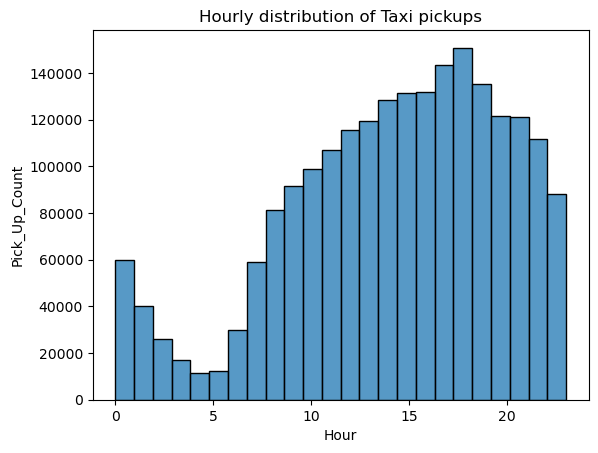

In [95]:
# Find and show the hourly trends in taxi pickups
sns.histplot(df.tpep_pickup_datetime.dt.hour, label="Hour", bins=24)
plt.title("Hourly distribution of Taxi pickups", fontsize=12)
plt.xlabel("Hour")
plt.ylabel("Pick_Up_Count")
plt.show()

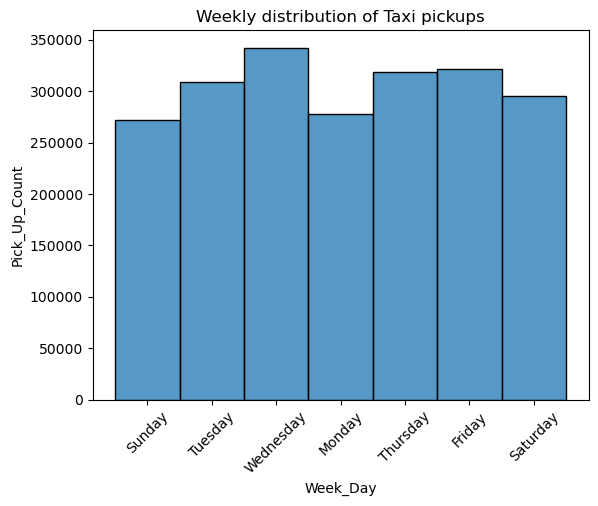

In [96]:
# Find and show the daily trends in taxi pickups (days of the week)
df['week_day'] = df['tpep_pickup_datetime'].apply(lambda x: x.strftime("%A"))
sns.histplot(df.week_day, label="week_day", bins=7)
plt.title("Weekly distribution of Taxi pickups", fontsize=12)
plt.xlabel("Week_Day")
plt.ylabel("Pick_Up_Count")
plt.xticks(rotation=45)
plt.show()

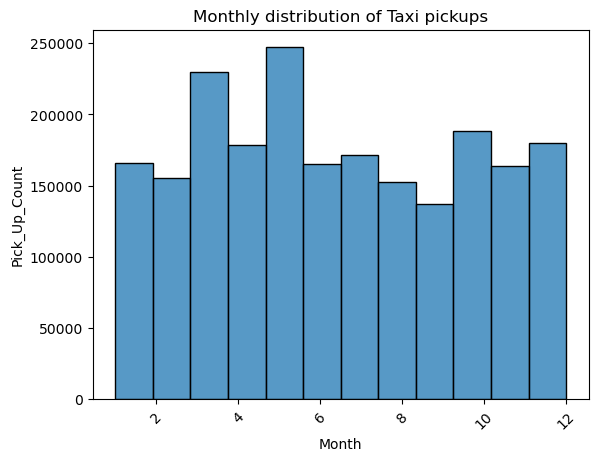

In [97]:
# Show the monthly trends in pickups
sns.histplot(df.tpep_pickup_datetime.dt.month, label="Month", bins=12)
plt.title("Monthly distribution of Taxi pickups", fontsize=12)
plt.xlabel("Month")
plt.ylabel("Pick_Up_Count")
plt.xticks(rotation=45)
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

<Axes: >

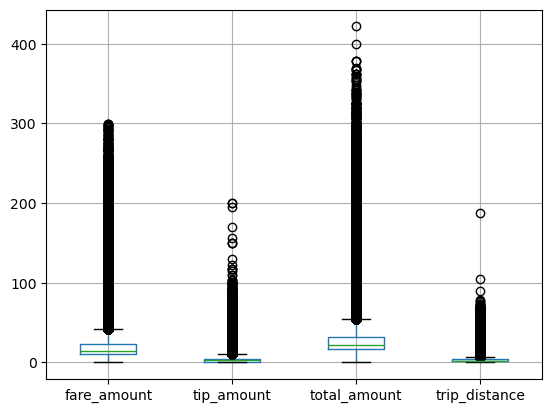

In [100]:
# Analyse the above parameters

sub_df=df[['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']]

sub_df.boxplot()

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [103]:
# Create a df with non zero entries for the selected parameters.
#we already handled this in 2.3 Handling Outliers


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

<Axes: xlabel='month'>

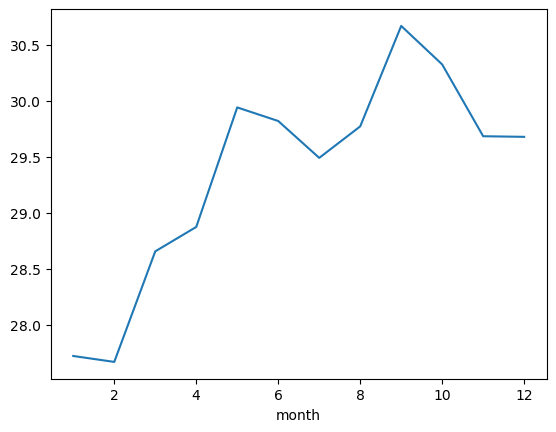

In [105]:
# Group data by month and analyse monthly revenue
df['month'] = df.tpep_pickup_datetime.dt.month
df.groupby(['month'])['total_amount'].mean().plot()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [108]:
# Calculate proportion of each quarter

#TOD

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

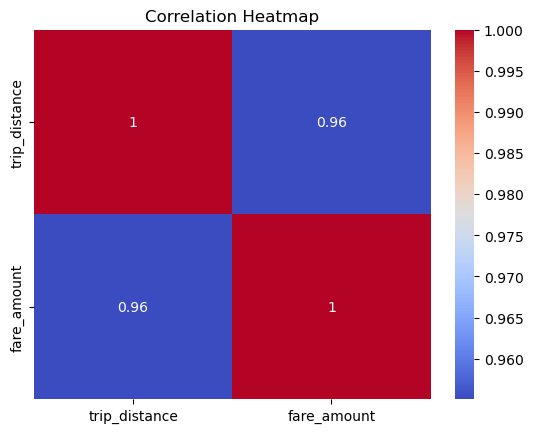

In [116]:
# Show how trip fare is affected by distance
correlation_matrix = df[['trip_distance', 'fare_amount']].corr()

# Display correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

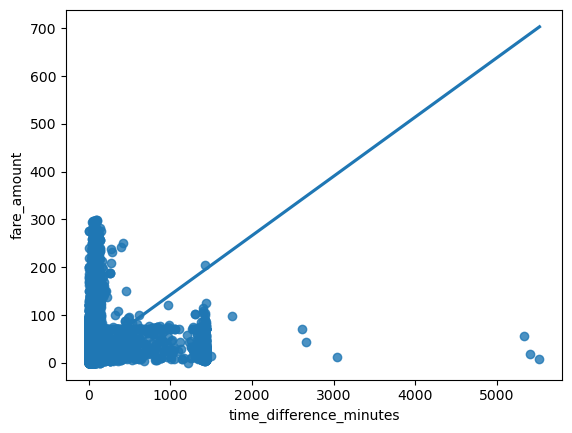

In [119]:
# Show relationship between fare and trip duration
df['time_difference_minutes'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds().abs() / 60
sns.regplot(x ="time_difference_minutes", y="fare_amount", ci = None, data = df)
plt.show()

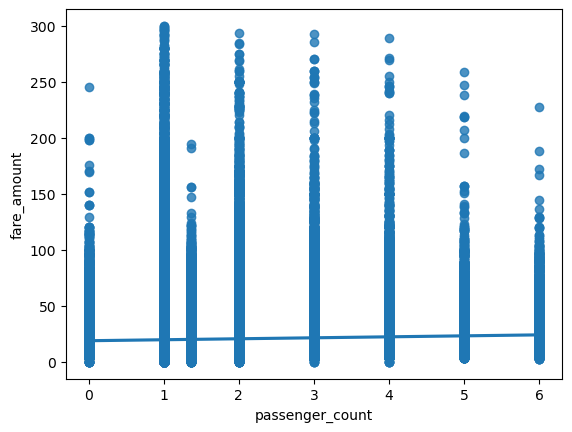

In [120]:
# Show relationship between fare and number of passengers
sns.regplot(x ="passenger_count", y="fare_amount", ci = None, data = df)
plt.show()

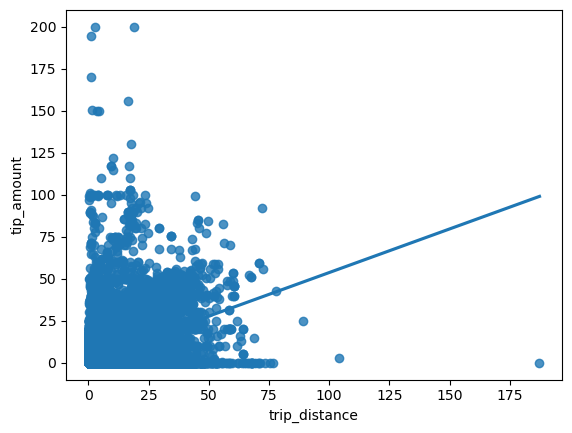

In [121]:
# Show relationship between tip and trip distance

sns.regplot(x ="trip_distance", y="tip_amount", ci = None, data = df)
plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

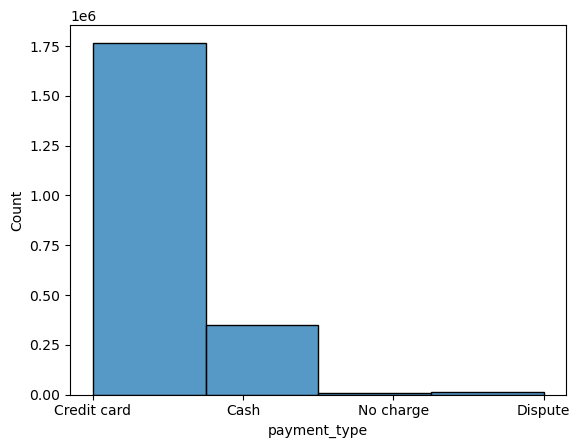

In [123]:
# Analyse the distribution of different payment types (payment_type).
sns.histplot(df['payment_type'], label="Payment Type", bins=4)
plt.xticks([1, 2, 3, 4], ['Credit card', 'Cash', 'No charge', 'Dispute'])
plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute

##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [128]:
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [130]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file('../Datasets and Dictionary/taxi_zones/taxi_zones.shp')
zones.head()
#df['PULocationID'].value_counts()
#zones['LocationID'].value_counts()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

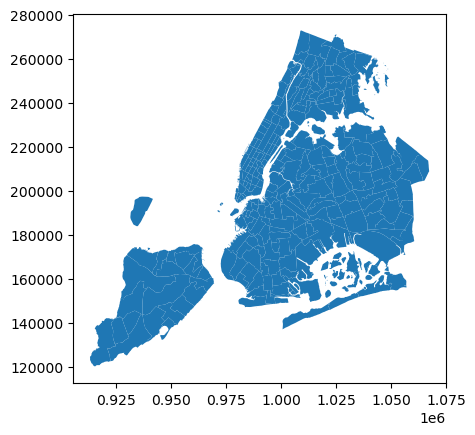

In [132]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [135]:
# Merge zones and trip records using locationID and PULocationID
merged_df = pd.merge(df, zones, left_on='PULocationID', right_on='LocationID', how='left')
merged_df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:31:50   2023-01-01 00:44:17         2.000000   
1         2  2023-01-01 00:10:50   2023-01-01 00:24:12         4.000000   
2         2  2023-01-01 00:25:37   2023-01-01 00:34:52         1.000000   
3         2  2023-01-01 00:27:26   2023-01-01 00:52:20         2.000000   
4         2  2023-01-01 00:59:15   2023-01-01 01:23:15         1.368034   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           2.85    1.000000                  N           263            41   
1           1.32    1.000000                  N            90           137   
2           3.17    1.000000                  N            79           141   
3           3.80    1.000000                  N           142           107   
4           7.97    1.640799               None           140            17   

   payment_type  ...  week_day  month  time_difference_minutes  OBJECTID  \
0             1  ...    Sunday      1                12.450000     263.0   
1             1  ...    Sunday      1                13.366667      90.0   
2             1  ...    Sunday      1                 9.250000      79.0   
3             2  ...    Sunday      1                24.900000     142.0   
4             1  ...    Sunday      1                24.000000     140.0   

   Shape_Leng  Shape_Area                 zone  LocationID    borough  \
0    0.037017    0.000066       Yorkville West       263.0  Manhattan   
1    0.030759    0.000055             Flatiron        90.0  Manhattan   
2    0.042625    0.000108         East Village        79.0  Manhattan   
3    0.038176    0.000076  Lincoln Square East       142.0  Manhattan   
4    0.047584    0.000114      Lenox Hill East       140.0  Manhattan   

                                            geometry  
0  POLYGON ((997493.323 220912.386, 997355.264 22...  
1  POLYGON ((985265.129 208165.863, 985125.733 20...  
2  POLYGON ((988746.067 202151.955, 988733.885 20...  
3  POLYGON ((989380.305 218980.247, 989359.803 21...  
4  POLYGON ((995735.062 215619.835, 995670.105 21...  

[5 rows x 29 columns]

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [137]:
# Group data by location and calculate the number of trips
grouped_df = merged_df.groupby('LocationID')
trip_counts = grouped_df.size()
trip_counts_df = trip_counts.reset_index(name='TripCount')
trip_counts_df.head()

LocationID  TripCount
0         1.0         12
1         2.0          2
2         3.0         34
3         4.0       2564
4         5.0         10

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [139]:
# Merge trip counts back to the zones GeoDataFrame
trip_zones_df = pd.merge(zones, trip_counts_df, on='LocationID', how='left')
trip_zones_df.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  TripCount  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...       12.0  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...        2.0  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...       34.0  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...     2564.0  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...       10.0

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

<Axes: >

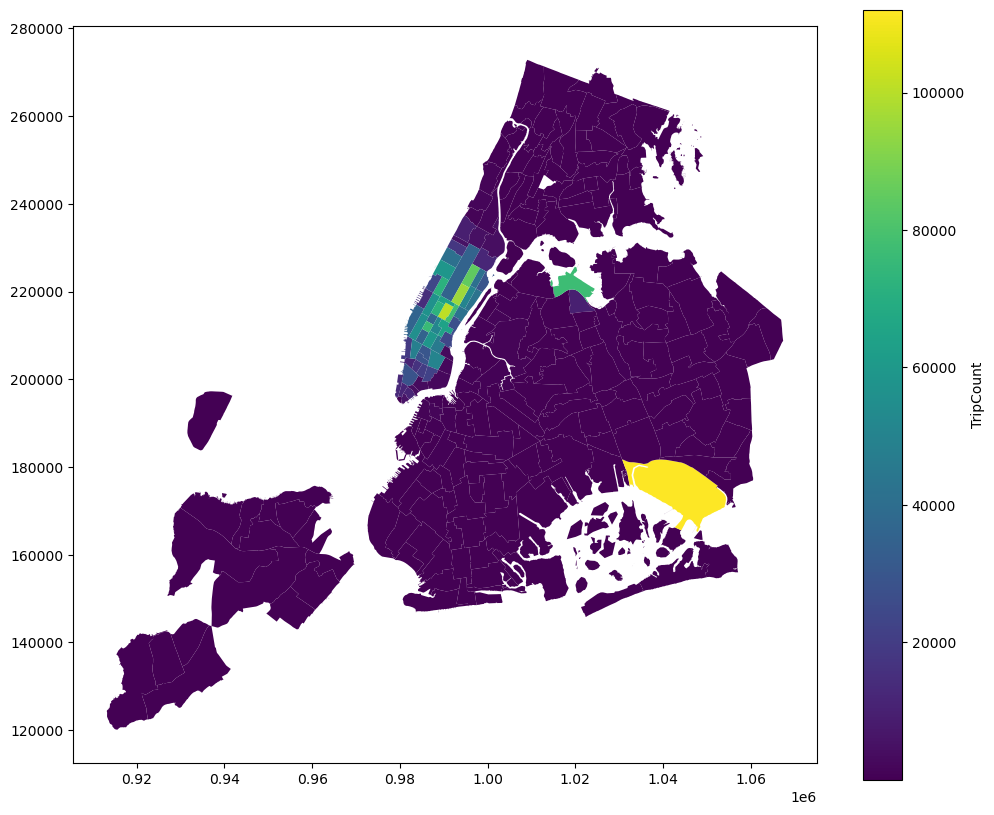

In [143]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12, 10))
# Plot the map and display it
trip_zones_df.plot(column = 'TripCount',
ax = ax,
legend = True,
legend_kwds = {'label': "TripCount", 'orientation': "vertical"})

In [144]:
# can you try displaying the zones DF sorted by the number of trips?
sorted_trip_zones_df = trip_zones_df.sort_values(by='TripCount', ascending=False)
sorted_trip_zones_df.head()

OBJECTID  Shape_Leng  Shape_Area                   zone  LocationID  \
131       132    0.245479    0.002038            JFK Airport         132   
160       161    0.035804    0.000072         Midtown Center         161   
236       237    0.042213    0.000096  Upper East Side South         237   
235       236    0.044252    0.000103  Upper East Side North         236   
161       162    0.035270    0.000048           Midtown East         162   

       borough                                           geometry  TripCount  
131     Queens  MULTIPOLYGON (((1032791.001 181085.006, 103283...   112058.0  
160  Manhattan  POLYGON ((991081.026 214453.698, 990952.644 21...   100693.0  
236  Manhattan  POLYGON ((993633.442 216961.016, 993507.232 21...    95730.0  
235  Manhattan  POLYGON ((995940.048 221122.92, 995812.322 220...    84846.0  
161  Manhattan  POLYGON ((992224.354 214415.293, 992096.999 21...    77626.0

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [153]:
# Find routes which have the slowest speeds at different times of the day
merged_df['route_speed(km/min)'] = (df['trip_distance']/df['time_difference_minutes'])
merged_df['hour'] = merged_df['tpep_pickup_datetime'].dt.hour
sorted_merged_df = merged_df.sort_values(by='route_speed(km/min)')
sorted_merged_df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
656856          2  2023-12-26 22:21:56   2023-12-26 22:25:03              2.0   
1415831         2  2023-04-04 08:20:07   2023-04-04 08:32:24              1.0   
1260582         2  2023-02-03 22:22:21   2023-02-03 22:28:09              1.0   
2019996         2  2023-09-05 19:12:46   2023-09-05 19:30:02              1.0   
776859          1  2023-03-11 08:49:24   2023-03-11 08:52:11              0.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
656856            0.72         1.0                  N           137   
1415831           1.39         1.0                  N           229   
1260582           0.71         1.0                  N           141   
2019996           2.36         1.0                  N           186   
776859            0.60         1.0                  N           249   

         DOLocationID  payment_type  ...  time_difference_minutes  OBJECTID  \
656856             79             1  ...                 3.116667     137.0   
1415831           100             1  ...                12.283333     229.0   
1260582           163             1  ...                 5.800000     141.0   
2019996           148             1  ...                17.266667     186.0   
776859            113             2  ...                 2.783333     249.0   

         Shape_Leng  Shape_Area                           zone  LocationID  \
656856     0.046108    0.000116                       Kips Bay       137.0   
1415831    0.042525    0.000095  Sutton Place/Turtle Bay North       229.0   
1260582    0.041514    0.000077                Lenox Hill West       141.0   
2019996    0.024696    0.000037   Penn Station/Madison Sq West       186.0   
776859     0.036384    0.000072                   West Village       249.0   

           borough                                           geometry  \
656856   Manhattan  POLYGON ((991954.728 209026.462, 991949.076 20...   
1415831  Manhattan  POLYGON ((994880.664 214401.395, 994724.359 21...   
1260582  Manhattan  POLYGON ((994839.073 216123.698, 994786.74 216...   
2019996  Manhattan  POLYGON ((986752.603 210853.699, 986627.863 21...   
776859   Manhattan  POLYGON ((983555.319 204876.901, 983469.158 20...   

         route_speed(km/min) hour  
656856              0.000092   22  
1415831             0.000130    8  
1260582             0.000176   22  
2019996             0.000188   19  
776859              0.000189    8  

[5 rows x 31 columns]

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

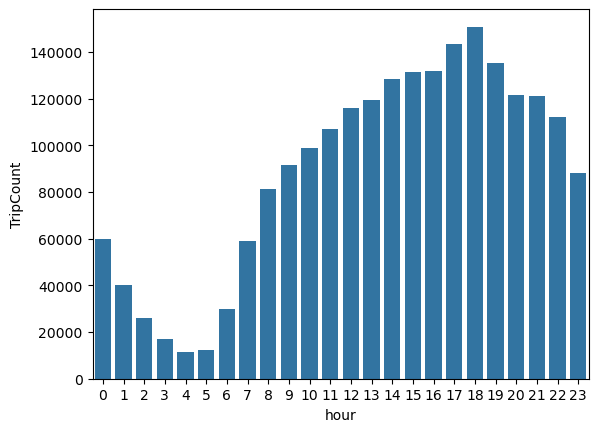

In [156]:
# Visualise the number of trips per hour and find the busiest hour
hourly_trip_df = merged_df.groupby('hour')
hourly_trip_counts = hourly_trip_df.size()
hourly_trip_counts_df = hourly_trip_counts.reset_index(name='TripCount')
hourly_trip_counts_df.head()
sns.barplot(data = hourly_trip_counts_df, x='hour', y='TripCount')
plt.show()

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [160]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
#sample_fraction =
hourly_trip_counts_df.sort_values(by='TripCount', ascending=False).head()


hour  TripCount
18    18     150872
17    17     143611
19    19     135468
16    16     131703
15    15     131438

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

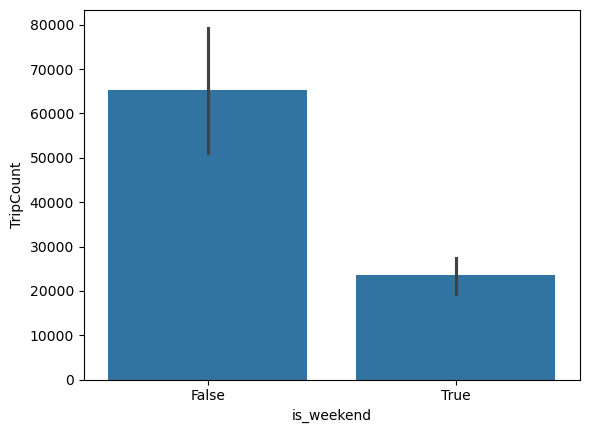

In [162]:
# Compare traffic trends for the week days and weekends
merged_df['day_of_week'] = merged_df['tpep_pickup_datetime'].dt.weekday

# Check if it's a weekend
merged_df['is_weekend'] = merged_df['day_of_week'] >= 5
weekday_hourly_trip_df = merged_df.groupby(['hour', 'is_weekend'])
weekday_hourly_trip_counts = weekday_hourly_trip_df.size()
weekday_hourly_trip_counts_df = weekday_hourly_trip_counts.reset_index(name='TripCount')
sns.barplot(data = weekday_hourly_trip_counts_df, x='is_weekend', y='TripCount')
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

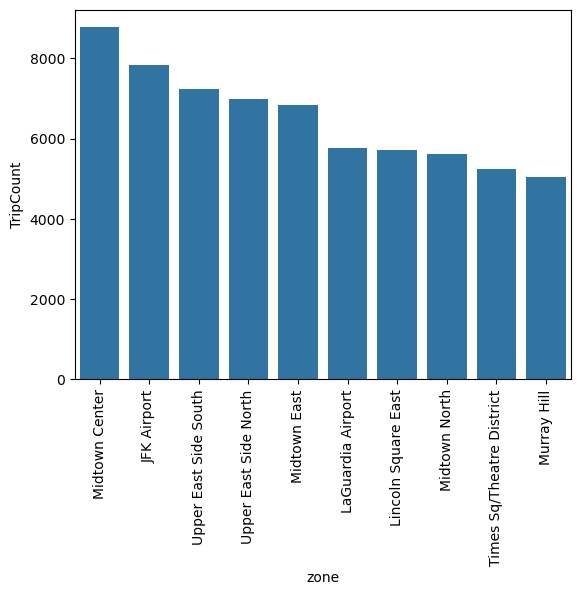

In [165]:
# Find top 10 pickup and dropoff zones
PULocationID_hourly_trip_df = merged_df.groupby(['PULocationID', 'zone', 'hour'])
PULocationID_hourly_trip_counts = PULocationID_hourly_trip_df.size()
PULocationID_hourly_trip_counts_df = PULocationID_hourly_trip_counts.reset_index(name='TripCount')
sorted_PULocationID_hourly_trip_counts_df= PULocationID_hourly_trip_counts_df.sort_values(by='TripCount', ascending=False)
top_zones = sorted_PULocationID_hourly_trip_counts_df.drop_duplicates(subset=["zone"], keep="first").head(10)

sns.barplot(data = top_zones, x = 'zone', y='TripCount')
plt.xticks(rotation=90)
plt.show()

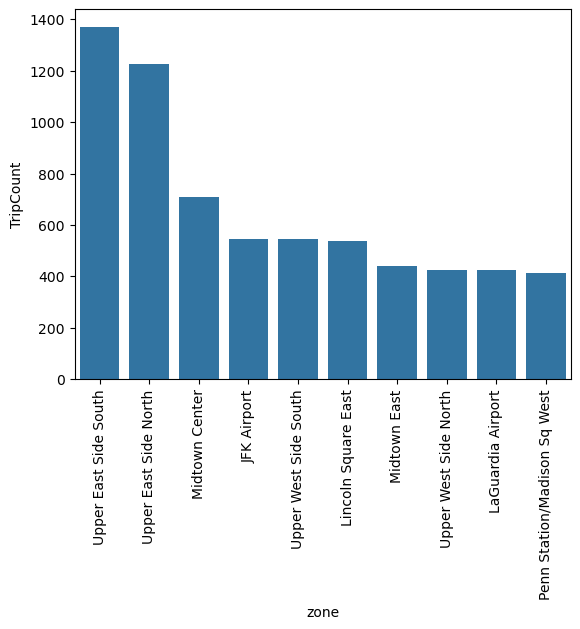

In [166]:
DOLocationID_hourly_trip_df = merged_df.groupby(['DOLocationID', 'zone', 'hour'])
DOLocationID_hourly_trip_counts = DOLocationID_hourly_trip_df.size()
DOLocationID_hourly_trip_counts_df = DOLocationID_hourly_trip_counts.reset_index(name='TripCount')
sorted_DOLocationID_hourly_trip_counts_df = DOLocationID_hourly_trip_counts_df.sort_values(by='TripCount', ascending=False)

top_zones = sorted_DOLocationID_hourly_trip_counts_df.drop_duplicates(subset=["zone"], keep="first").head(10)

sns.barplot(data = top_zones, x = 'zone', y='TripCount')
plt.xticks(rotation=90)
plt.show()

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [168]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
DOLocationID_PULocationID_trip_df = merged_df.groupby(['zone','DOLocationID', 'PULocationID'])
DOLocationID_PULocationID_trip_counts = DOLocationID_PULocationID_trip_df.size()
DOLocationID_PULocationID_trip_counts_df =DOLocationID_PULocationID_trip_counts.reset_index()

sorted_DOLocationID_PULocationID_trip_counts_df = DOLocationID_PULocationID_trip_counts_df.sort_values(by=0, ascending=False)
print(sorted_DOLocationID_PULocationID_trip_counts_df.head(10))
print(sorted_DOLocationID_PULocationID_trip_counts_df.tail(10))

                        zone  DOLocationID  PULocationID      0
17369  Upper East Side South           236           237  15428
17171  Upper East Side North           237           236  13256
11577         Midtown Center           237           161   7376
17311  Upper East Side South           161           237   7023
11576         Midtown Center           236           161   6233
9962     Lincoln Square East           239           142   5985
17662  Upper West Side South           142           239   5714
17725  Upper West Side South           238           239   5528
8443             JFK Airport           230           132   5526
17312  Upper East Side South           162           237   5521
                          zone  DOLocationID  PULocationID  0
14988         South Ozone Park           142           216  1
3319              Coney Island           216            55  1
9941       Lincoln Square East           212           142  1
3315              Coney Island           191    

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

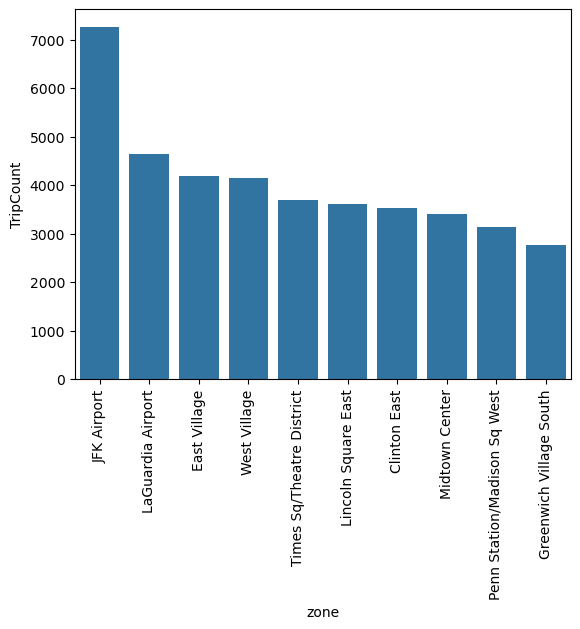

In [170]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
merged_df_night_hours_df = merged_df[merged_df['hour'].isin([23, 0, 1, 2, 3, 4, 5])]
# top 10 pick up zones
PULocationID_hourly_trip_df = merged_df_night_hours_df.groupby(['PULocationID', 'zone', 'hour'])
PULocationID_hourly_trip_counts = PULocationID_hourly_trip_df.size()
PULocationID_hourly_trip_counts_df = PULocationID_hourly_trip_counts.reset_index(name='TripCount')
sorted_PULocationID_hourly_trip_counts_df= PULocationID_hourly_trip_counts_df.sort_values(by='TripCount', ascending=False)
top_zones = sorted_PULocationID_hourly_trip_counts_df.drop_duplicates(subset=["zone"], keep="first").head(10)

sns.barplot(data = top_zones, x = 'zone', y='TripCount')
plt.xticks(rotation=90)
plt.show()

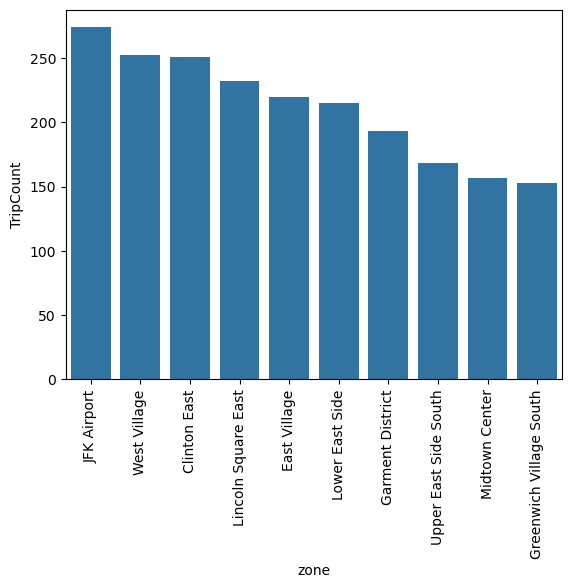

In [171]:
# top 10 drop off locations during night
DOLocationID_hourly_trip_df = merged_df_night_hours_df.groupby(['DOLocationID', 'zone', 'hour'])
DOLocationID_hourly_trip_counts = DOLocationID_hourly_trip_df.size()
DOLocationID_hourly_trip_counts_df = DOLocationID_hourly_trip_counts.reset_index(name='TripCount')
sorted_DOLocationID_hourly_trip_counts_df = DOLocationID_hourly_trip_counts_df.sort_values(by='TripCount', ascending=False)

top_zones = sorted_DOLocationID_hourly_trip_counts_df.drop_duplicates(subset=["zone"], keep="first").head(10)

sns.barplot(data = top_zones, x = 'zone', y='TripCount')
plt.xticks(rotation=90)
plt.show()

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [173]:
# Filter for night hours (11 PM to 5 AM)
print("night time revenue: ")
print(merged_df_night_hours_df['total_amount'].sum())

#all hours amount
print("total revenue: ")
print(merged_df['total_amount'].sum())

#day time revenue
print("day time revenue: ")
print(merged_df['total_amount'].sum() - merged_df_night_hours_df['total_amount'].sum())

night time revenue: 
7617305.7299999995
total revenue: 
62679450.26000003
day time revenue: 
55062144.53000003


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

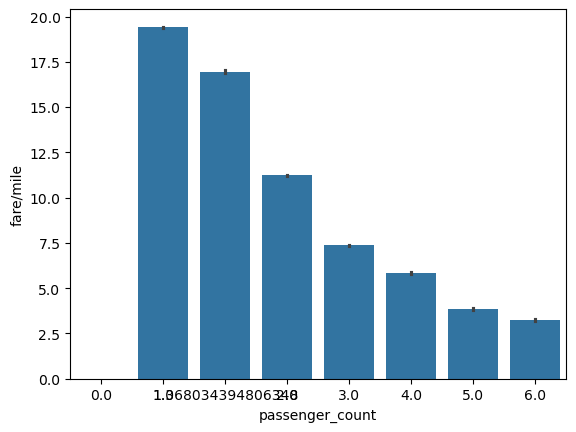

In [176]:
# Analyse the fare per mile per passenger for different passenger counts
merged_df['fare/mile'] = merged_df['fare_amount'] / merged_df['passenger_count']
merged_df.head()
sns.barplot(x ="passenger_count", y="fare/mile", data = merged_df)
plt.show()


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

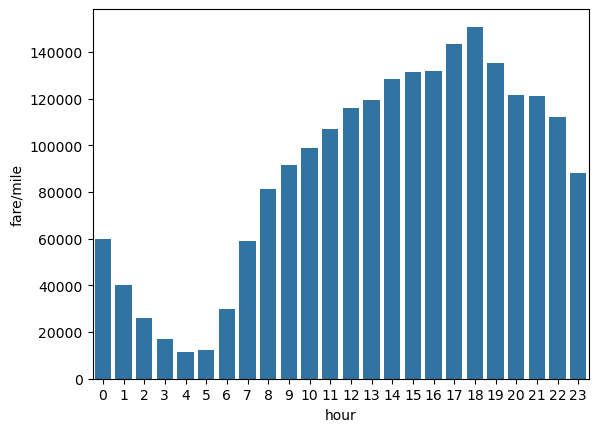

In [178]:
# Compare the average fare per mile for different days and for different times of the day
#fare per mile for diffrent times of the day
hourly_trip_df = merged_df.groupby('hour')
hourly_trip_counts = hourly_trip_df.size()
hourly_trip_counts_df = hourly_trip_counts.reset_index(name='fare/mile')
hourly_trip_counts_df.head()
sns.barplot(data = hourly_trip_counts_df, x='hour', y='fare/mile')
plt.show()

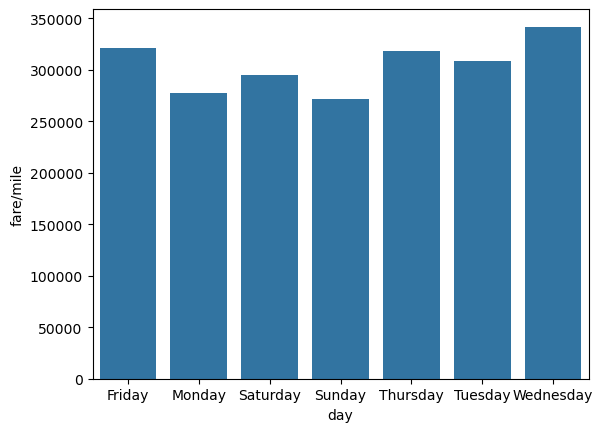

In [179]:
#fare per mile for diffrent days
merged_df['day'] = merged_df['tpep_pickup_datetime'].dt.day_name()
daywise_trip_df = merged_df.groupby('day')
daywise_trip_counts = daywise_trip_df.size()
daywise_trip_counts_df = daywise_trip_counts.reset_index(name='fare/mile')
sns.barplot(data = daywise_trip_counts_df, x='day', y='fare/mile')
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

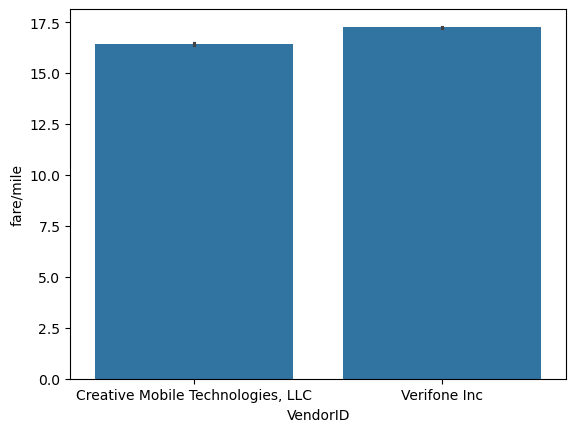

In [215]:
# Compare fare per mile for different vendors
merged_df = merged_df[merged_df['VendorID'] != 6]
merged_df['VendorID'].value_counts()
sns.barplot(data = merged_df, x = 'VendorID', y='fare/mile')
plt.xticks([0,1], ['Creative Mobile Technologies, LLC', 'Verifone Inc'])
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [ ]:
# Defining distance tiers



##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [ ]:
#  Analyze tip percentages based on distances, passenger counts and pickup times



Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [ ]:
# See how passenger count varies across hours and days




**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [ ]:
# How does passenger count vary across zones



In [ ]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.



Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [ ]:
# How often is each surcharge applied?



## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.